## EEUU ESTADO DE MISSOURI

### Vista previa de los datos 

In [1]:
# Librerias a utilizar 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
import scipy.stats as stats
import warnings
import json
import os 
warnings.filterwarnings('ignore')

In [2]:
# vamos a crear funciones para saber cuantos duplicados, faltantes tenemos en los conjuntos de datos
def null(df, decimales=2):
    # cantidad de null + % 
    df_nulos = pd.DataFrame({
        "Numeros de nulos" : df.isnull().sum(),
        "Porcentaje de nulos" : (df.isnull().sum() / df.shape[0]) * 100.0 # # Calcula el porcentaje de valores faltantes en la columna
    })
    # Convierte el porcentaje a cadena y añade el símbolo de porcentaje
    df_nulos['Porcentaje de nulos'] = df_nulos['Porcentaje de nulos'].round(decimales).astype(str) + "%"
    return df_nulos


def suma_duplicados(df, decimales=2):
    # Identifica las filas duplicadas
    duplicados = df[df.duplicated()]
    
    # Inicializa diccionarios para almacenar los resultados
    num_duplicados = {}
    porcentaje_duplicados = {}
    
    for col in df.columns:
        # Cuenta el número de duplicados en la columna
        num_duplicados[col] = duplicados[col].count()
        
        # Calcula el porcentaje de duplicados en la columna
        porcentaje_duplicados[col] = (num_duplicados[col] / df.shape[0]) * 100.0
    
    # Crea un DataFrame para los resultados
    df_duplicados = pd.DataFrame({
        "Numero de Duplicados": pd.Series(num_duplicados),
        "Porcentaje de Duplicados": pd.Series(porcentaje_duplicados)
    })
    
    # Convierte el porcentaje a cadena y añade el símbolo de porcentaje
    df_duplicados["Porcentaje de Duplicados"] = df_duplicados["Porcentaje de Duplicados"].round(decimales).astype(str) + "%"
        
    return df_duplicados

In [3]:
with open("Data/review-Missouri/1.json", "r") as file:
    contenet = file.read()
    print(contenet)

In [ ]:
def abrir_json(ruta):
    datos =[]
    with open(ruta, "r") as file:
        lines = file.readlines()
        for line in lines:
            try:
                data = json.loads(line)
                datos.append(data)
            except json.JSONDecodeError:
                print("linea invalida", line)
    # Convertir la lista de datos a un DataFrame
    df = pd.DataFrame(datos)
    return df               

In [ ]:
# Directorio donde se encuentran los archivos JSON
directorio = 'Data/review-Missouri/'

# Diccionario para almacenar los DataFrames
dataframes = {}

# Iterar sobre los archivos JSON en el directorio
for archivo in os.listdir(directorio):
    if archivo.endswith('.json'):
        ruta_completa = os.path.join(directorio, archivo)
        nombre_df = os.path.splitext(archivo)[0]  # Usar el nombre del archivo sin la extensión como clave
        dataframes[nombre_df] = abrir_json(ruta_completa)

In [ ]:
df_1 = dataframes['1']
df_2 = dataframes['2']
df_3 = dataframes['3']
df_4 = dataframes['4']
df_5 = dataframes['5']
df_6 = dataframes['6']
df_7 = dataframes['7']
df_8 = dataframes['8']
df_9 = dataframes['9']
df_10 = dataframes['10']
df_11 = dataframes['11']

In [ ]:
# Unificamos todos
df_missouri = pd.concat([df_1, df_2, df_3, df_4, df_5, df_6, df_7, df_8, df_9, df_10, df_11], ignore_index=True)


In [ ]:
# Analizamos los datos 
df_missouri.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1650000 entries, 0 to 1649999
Data columns (total 8 columns):
 #   Column   Non-Null Count    Dtype 
---  ------   --------------    ----- 
 0   user_id  1650000 non-null  object
 1   name     1650000 non-null  object
 2   time     1650000 non-null  int64 
 3   rating   1650000 non-null  int64 
 4   text     952732 non-null   object
 5   pics     39723 non-null    object
 6   resp     230759 non-null   object
 7   gmap_id  1650000 non-null  object
dtypes: int64(2), object(6)
memory usage: 100.7+ MB


In [ ]:
df_missouri.sample(4)

,user_id,name,time,rating,text,pics,resp,gmap_id
1278933,102699282353712673643,Chris woolman,1588532726552,2,None,None,None,0x87d00562294e8693:0x5690c462b93612e9
424829,109377662522211034266,Chris Schwartz,1603129526939,5,None,None,"{'time': 1603194660377, 'text': 'Thank you, Ch...",0x87ded119b6bee7f3:0x166b383bf81e25e
1489681,104372542887414611248,Dani Pulliam,1459031316709,1,Horrible place ! The vet was an absolute idiot...,None,"{'time': 1459477412372, 'text': 'Hello Daniell...",0x87cf7b17c8d360d7:0xf5f132e82f1647d
1066364,110572774378582404654,Donna Bellis,1614122313241,5,Nice place,None,None,0x87c0fff544ebef9f:0xedbe8917de1a786


In [ ]:
null(df_missouri, decimales=2)

,Numeros de nulos,Porcentaje de nulos
user_id,0,0.0%
name,0,0.0%
time,0,0.0%
rating,0,0.0%
text,697268,42.26%
pics,1610277,97.59%
resp,1419241,86.01%
gmap_id,0,0.0%


In [ ]:
rantings = df_missouri['rating']
rantings = rantings.value_counts()
rantings

rating
5    1049622
4     318436
3     144194
1      85923
2      51825
Name: count, dtype: int64

In [ ]:
# Sacamos el porcentaje de estos valores 
ratings_porce = pd.Series({
5 :   1049622,
4 :    318436,
3 :    144194,
1 :     85923,
2 :     51825
})

total = ratings_porce.sum()
# Calculamos el procentaje para cada rating
porce = (ratings_porce / total) * 100

# Muestra de los resultados
porce = porce.round(2)
print(porce)

5    63.61
4    19.30
3     8.74
1     5.21
2     3.14
dtype: float64


In [ ]:
# veremos que fila contiene una lista 
for column in df_missouri.columns:
    if df_missouri[column].apply(lambda x: isinstance(x, list)).any():
        print(f"Columna '{column}' contiene listas")

Columna 'pics' contiene listas


In [ ]:
# veremos que fila contiene un diccionario
for column in df_missouri.columns:
    if df_missouri[column].apply(lambda x: isinstance(x, dict)).any():
        print(f"Columna '{column}' contiene un diccionario")

Columna 'resp' contiene un diccionario


In [ ]:
# Teniendo en cuenta que esa columna tiene muchos datos faltantes, vamos a borrarlo
df_missouri.drop(columns=['pics'], inplace=True)

In [ ]:
df_missouri.columns

Index(['user_id', 'name', 'time', 'rating', 'text', 'resp', 'gmap_id'], dtype='object')

In [ ]:
# La columna resp contiene diccionario, vamos evitarlo para ver los duplicados
duplicados = df_missouri[['user_id', 'name', 'time', 'rating', 'text', 'gmap_id']]
suma_duplicados(duplicados)

,Numero de Duplicados,Porcentaje de Duplicados
user_id,29950,1.82%
name,29950,1.82%
time,29950,1.82%
rating,29950,1.82%
text,28050,1.7%
gmap_id,29950,1.82%


In [ ]:
# vamos a rellenar esos valores faltantes en la columa text a SD significa Sin Dato
df_missouri['text'].fillna('SD', inplace=True)

In [ ]:
# Utilizamos sentiment analysis para reconocer mediante numeros sus valoraciones 
from textblob import TextBlob

def analyze_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return 'positivo'
    elif analysis.sentiment.polarity == 0:
        return 'neutro'
    else:
        return 'negativo'

df_missouri['sentimiento'] = df_missouri['text'].apply(analyze_sentiment)

# Contar la frecuencia de cada sentimiento
sentiment_counts = df_missouri['sentimiento'].value_counts()

In [ ]:
sentiment_counts

sentimiento
positivo    798083
neutro      775402
negativo     76515
Name: count, dtype: int64

In [ ]:
sentiment_counts_proba = pd.Series({
'positivo' :    798083,
'positivo'   :   775402,
'negativo' :    76515    
})

total = sentiment_counts_proba.sum()
# Calculamos el procentaje para cada rating
porce = (sentiment_counts_proba / total) * 100

# Muestra de los resultados
porce = porce.round(2)
print(porce)

positivo    91.02
negativo     8.98
dtype: float64


In [ ]:
# remplazamos el SD a null
df_missouri['text'].replace('SD', np.nan, inplace=True)

In [ ]:
# Total de valores en la columna text.
text = df_missouri['text']
text.shape

(1650000,)

In [ ]:
#porcentaje de respuestas 
respuestas = (total / 1650000)*100
print(respuestas)

51.63133333333333


## EEUU ESTADO DE MASSACHUSETS

### Vista previa de los datos

In [ ]:
# Directorio donde se encuentran los archivos JSON
directorio = 'Data/review-Massachusetts/'

# Diccionario para almacenar los DataFrames
dataframes = {}

# Iterar sobre los archivos JSON en el directorio
for archivo in os.listdir(directorio):
    if archivo.endswith('.json'):
        ruta_completa = os.path.join(directorio, archivo)
        nombre_df = os.path.splitext(archivo)[0]  # Usar el nombre del archivo sin la extensión como clave
        dataframes[nombre_df] = abrir_json(ruta_completa)

In [ ]:
df_1 = dataframes['1']
df_2 = dataframes['2']
df_3 = dataframes['3']
df_4 = dataframes['4']
df_5 = dataframes['5']
df_6 = dataframes['6']
df_7 = dataframes['7']
df_8 = dataframes['8']
df_9 = dataframes['9']
df_10 = dataframes['10']
df_11 = dataframes['11'] 
df_12 = dataframes['12']
df_13 = dataframes['13']
df_14 = dataframes['14']
df_15 = dataframes['15']
df_16 = dataframes['16']


In [ ]:
# Unificamos todos
df_massa = pd.concat([df_1, df_2, df_3, df_4, df_5, df_6, df_7, df_8, df_9, df_10, df_11, df_12, df_13, df_14, df_15, df_16], ignore_index=True)

In [ ]:
df_massa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2400000 entries, 0 to 2399999
Data columns (total 8 columns):
 #   Column   Dtype 
---  ------   ----- 
 0   user_id  object
 1   name     object
 2   time     int64 
 3   rating   int64 
 4   text     object
 5   pics     object
 6   resp     object
 7   gmap_id  object
dtypes: int64(2), object(6)
memory usage: 146.5+ MB


In [ ]:
null(df_massa)

,Numeros de nulos,Porcentaje de nulos
user_id,0,0.0%
name,0,0.0%
time,0,0.0%
rating,0,0.0%
text,1128070,47.0%
pics,2330502,97.1%
resp,2183863,90.99%
gmap_id,0,0.0%


In [ ]:
# veremos que fila contiene una lista 
for column in df_massa.columns:
    if df_massa[column].apply(lambda x: isinstance(x, list)).any():
        print(f"Columna '{column}' contiene una lista")

Columna 'pics' contiene una lista


In [ ]:
# veremos que fila contiene un diccionario
for column in df_massa.columns:
    if df_massa[column].apply(lambda x: isinstance(x, dict)).any():
        print(f"Columna '{column}' contiene un diccionario")

Columna 'resp' contiene un diccionario


In [ ]:
df_massa.columns

Index(['user_id', 'name', 'time', 'rating', 'text', 'pics', 'resp', 'gmap_id'], dtype='object')

In [ ]:
df_masivo = df_massa[['user_id', 'name', 'time', 'rating', 'text','gmap_id']]
suma_duplicados(df_masivo)

,Numero de Duplicados,Porcentaje de Duplicados
user_id,19702,0.82%
name,19702,0.82%
time,19702,0.82%
rating,19702,0.82%
text,18088,0.75%
gmap_id,19702,0.82%


In [ ]:
cuentas = df_massa['rating']
cuentas = cuentas.value_counts()
print(cuentas)

rating
5    1451249
4     549425
3     226295
1     101490
2      71541
Name: count, dtype: int64


In [ ]:
# Sacamos el porcentaje de estos valores 
ratings_porce = pd.Series({
5 :   1451249,
4 :    549425,
3 :    226295,
1 :     101490,
2 :     71541
})

total = ratings_porce.sum()
# Calculamos el procentaje para cada rating
porce = (ratings_porce / total) * 100

# Muestra de los resultados
porce = porce.round(2)
print(porce)

5    60.47
4    22.89
3     9.43
1     4.23
2     2.98
dtype: float64


In [ ]:
df_masivo.dropna( inplace=True) # Eliminar faltantes

In [ ]:
# Antes vamos a eliminar los valores faltantes antes de aplicar el sentiment Analysis
# df_massa.dropna(subset=[df_massa.columns], inplace=True) # Eliminar faltantes
# df_masivo.drop_duplicates(inplace=True) # Vamos a eliminar los duplicados

df_masivo['sentimiento'] = df_masivo['text'].apply(analyze_sentiment)

# Contar la frecuencia de cada sentimiento
sentiment_counts_massa = df_masivo['sentimiento'].value_counts()
sentiment_counts_massa

sentimiento
positivo    1055248
negativo     101008
neutro        97586
Name: count, dtype: int64

In [ ]:
sentiment_counts_proba = pd.Series({
'positivo' :  1156256,
'negativo' :    97586  
})

total = sentiment_counts_proba.sum()
# Calculamos el procentaje para cada rating
porce = (sentiment_counts_proba / total) * 100

# Muestra de los resultados
porce = porce.round(2)
print(porce)

positivo    92.22
negativo     7.78
dtype: float64


In [ ]:
null(df_masivo)

,Numeros de nulos,Porcentaje de nulos
user_id,0,0.0%
name,0,0.0%
time,0,0.0%
rating,0,0.0%
text,0,0.0%
gmap_id,0,0.0%


In [ ]:
null(df_missouri)

,Numeros de nulos,Porcentaje de nulos
user_id,0,0.0%
name,0,0.0%
time,0,0.0%
rating,0,0.0%
text,697268,42.26%
resp,1419241,86.01%
gmap_id,0,0.0%
sentimiento,0,0.0%


In [ ]:
df_missouri.dropna(inplace=True)

In [ ]:
# vamos a observar que palabras se repitenn con mayor frecuencia, vamos a utilizar NLTK
import re
from collections import Counter
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Primero el estado de missouri
text = df_missouri['text']

#Segundo el estado de Massachustes
text_data = df_masivo['text']

text = text.str.lower().apply(lambda x: re.sub(r'\W+', ' ', x))
text_data = text_data.str.lower().apply(lambda x: re.sub(r'\W+', ' ', x))

# Tokenizar 
tokens = text.apply(word_tokenize)
tokens_2t = text_data.apply(word_tokenize)

# Eliminar stopwords
stop_word = set(stopwords.words('english'))
tokens = tokens.apply(lambda x: [word for word in x if word not in stop_word])
tokens_2t = tokens_2t.apply(lambda x: [word for word in x if word not in stop_word])

# Contamos la frecuencia 
all_words = [word for sublist in tokens for word in sublist]
all_words_2t = [word for sublist in tokens_2t for word in sublist]

Word_freq = Counter(all_words)
Word_freq_2t = Counter(all_words)

In [ ]:
# Convertir a DataFrame para graficar
word_freq_df = pd.DataFrame(Word_freq.items(), columns=['Word', 'Frequency']).sort_values(by='Frequency', ascending=False)
word_freq_df1 = pd.DataFrame(Word_freq_2t.items(), columns=['Word', 'Frequency']).sort_values(by='Frequency', ascending=False)

<Figure size 1000x600 with 0 Axes>

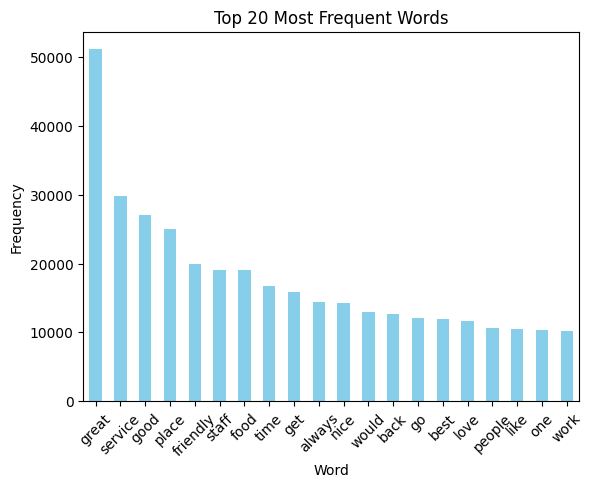

In [ ]:
# Gráfico de barras de las 20 palabras más frecuentes
plt.figure(figsize=(10,6))
word_freq_df.head(20).plot(kind='bar', x='Word', y='Frequency', color='skyblue', legend=False)
plt.title('Top 20 Most Frequent Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()


<Figure size 1000x600 with 0 Axes>

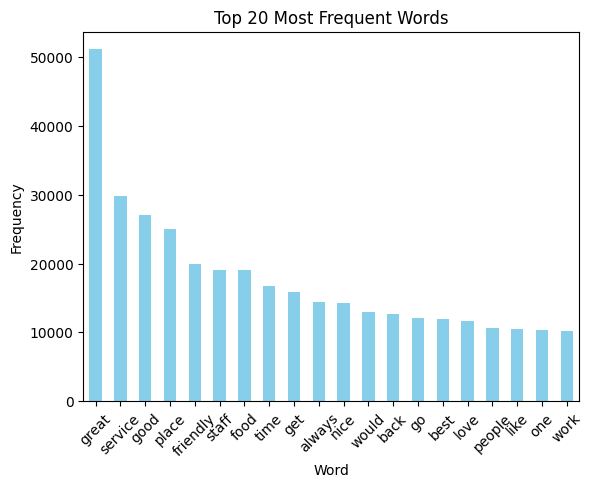

In [ ]:
# Gráfico de barras de las 20 palabras más frecuentes
plt.figure(figsize=(10,6))
word_freq_df1.head(20).plot(kind='bar', x='Word', y='Frequency', color='skyblue', legend=False)
plt.title('Top 20 Most Frequent Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

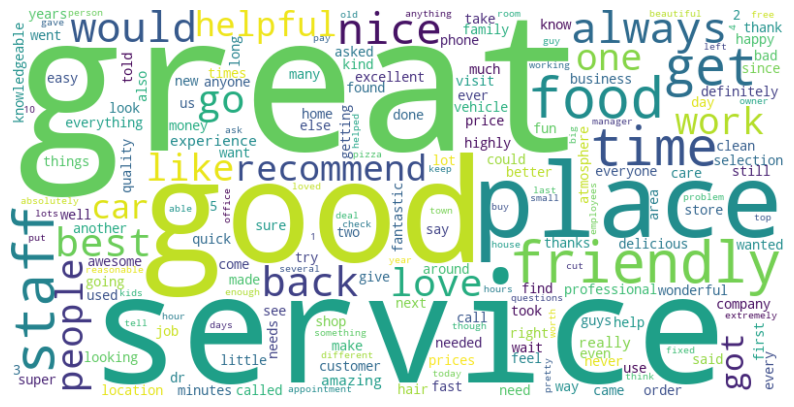

In [61]:
from wordcloud import WordCloud

# Generar un Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(Word_freq)

# Mostrar el Word Cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()



In [1]:
pip install folium


[notice] A new release of pip is available: 24.1.1 -> 24.2
[notice] To update, run: C:\Users\DELL\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



   ---------------------------------------- 0.0/108.4 kB ? eta -:--:--
   ----------- --------------------------- 30.7/108.4 kB 660.6 kB/s eta 0:00:01
   ----------- --------------------------- 30.7/108.4 kB 660.6 kB/s eta 0:00:01
   ---------------------- ---------------- 61.4/108.4 kB 409.6 kB/s eta 0:00:01
   ----------------------------------- -- 102.4/108.4 kB 535.8 kB/s eta 0:00:01
   -------------------------------------- 108.4/108.4 kB 483.6 kB/s eta 0:00:00
   ---------------------------------------- 0.0/85.1 kB ? eta -:--:--
   -------------------------------------- - 81.9/85.1 kB 2.3 MB/s eta 0:00:01
   ---------------------------------------- 85.1/85.1 kB 1.2 MB/s eta 0:00:00


In [5]:
# Practicamos algo que nos puede servir al proyecto 
import folium
from IPython.display import display

map_center = [40.7128, -74.0060]
mympap = folium.Map(location=map_center, zoom_start=12)

folium.Marker(
    [40.7128, -74.0060],
    popup = "New York",
    icon = folium.Icon(color='Blue', icon="info-sign")
).add_to(mympap)

display(mympap)


C:\Users\DELL\AppData\Local\Temp\ipykernel_5312\3504654349.py:11: UserWarning: color argument of Icon should be one of: {'beige', 'pink', 'darkgreen', 'orange', 'black', 'darkred', 'gray', 'lightred', 'cadetblue', 'lightgray', 'green', 'purple', 'blue', 'darkpurple', 'lightgreen', 'darkblue', 'white', 'lightblue', 'red'}.
  icon = folium.Icon(color='Blue', icon="info-sign")
